In [6]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import numpy as np
from numpy.random import default_rng
import argparse
import torch
file_fold = 'DATA/' #please replace it with the download path
import matplotlib.pyplot as plt
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
# ################ Parameter setting
#################################33


In [23]:
val = input("Enter the type of SRT data: v: Visium, s: non-visium")
#val='S'
if val=='v':
    ct='grid'
    r=None
    b:bool = False
    n=input("Enter the number of rings: (press 'n' if you want to use defult value)")
    n=int(n)
    if n=="n":
        n=1
else:
    ct='generic'
    r=input("Enter the radius(press 'n' if you want to use defult value)")
    r=int(r)
    if r=="n":
        r=0.3
    dt=input("Delaunay triangulation? if so press 'y' or press any key")
    if dt=="y":
        b:bool =True
    else:
        b:bool=False
    n=1


Enter the type of SRT data: v: Visium, s: non-visiums
Enter the radius(press 'n' if you want to use defult value)4
Delaunay triangulation? if so press 'y' or press any keym


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


loading preprocessing functions
Normalizing
log_transformation
applying PCA
leiden clustering


/home/roxana/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/home/roxana/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical


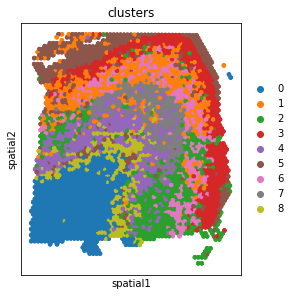

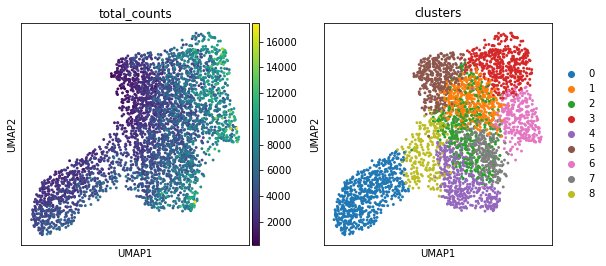

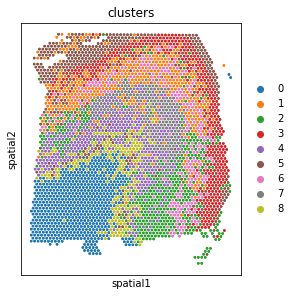

In [25]:
adata = sc.read_visium(file_fold, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
print("loading preprocessing functions")
# preprocessing
print("Normalizing")
sc.pp.normalize_total(adata)
print("log_transformation")
sc.pp.log1p(adata)
print("applying PCA")
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
print("leiden clustering")
sc.tl.leiden(adata, key_added="clusters")
sq.pl.spatial_scatter(adata, shape=None, color="clusters", size=50)
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=['total_counts', "clusters"], show=False)
#sc.tl.leiden(adata)
#sq.pl.spatial_scatter(adata, shape=None, color="leiden", size=50)
r=5
b:bool = False
n=1
ct='generic'
sq.gr.spatial_neighbors(adata, coord_type=ct, radius=r,  delaunay=b, n_rings=n)
sq.pl.spatial_scatter(
    adata,
    color="clusters",
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=1,
    size=10,
)

4